# Reinforcement Learning based Virtual Screening
Protein-Ligan pose prediction using RL

## Spatial block arrangement using RL CNN-DQN
__Input__
- Sandbox with block and the surface placemnt

__Output__
- <x, y, $\theta$> for block wrt Sandbox

### Generating the sandbox
The block world generates a block and places it in the surface by randomizing <x, y, $\theta$>. The $\theta$ rotated block is stored in the _block_ property of the Block class.

Both the block and the surface are combined together into a single sandbox image. (More here)

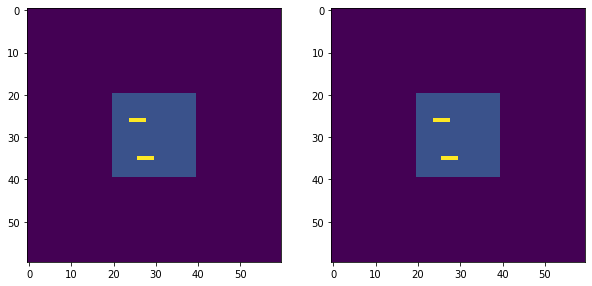

In [1]:
from rlvs.block_world.env import Env
import numpy as np
from matplotlib import pyplot as plt
env = Env()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()

### Update sandbox
Sandbox is updated with $\delta$x, $\delta$y and $\delta\theta$

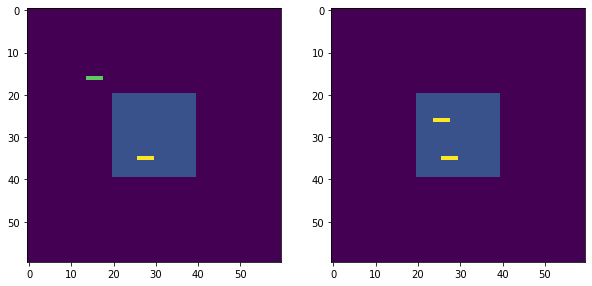

In [2]:
block = env.block
env.block.update_sandbox(-10, -10, -180)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()

### Perform env step
Sandbox can be updated by generating an array consisting of $\delta$x, $\delta$y and $\delta\theta$, which returns the reward and the next state and whether the terminal state has been reached

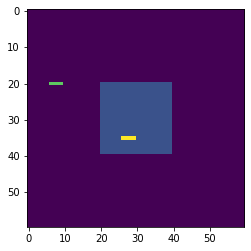

0 [ 3.65227941 -7.72167203 -8.46326961] (2, 3)


In [3]:
xx = env.action_space.sample()
env.block.block_x
state, reward, t = env.step(xx)
plt.imshow(env.block.sandbox)
plt.show()
print(reward, xx, env.action_space.action_bounds.shape)

### Absolute Fit
The absolute fit is when the block is placed square on top of the slot with $d \leq 0.1$


44.86342439892262
[28, 23, 30, 35]
[28, 18, 30, 20]
0 [-5, -15, 0] 14.582942720260204 14.582942720260204
[28, 18, 30, 20]
[28, 28, 30, 30]
0.8188956016068307 [9.5, 9.5, -111.9] 0.6262026696726757 0.6262026696726757


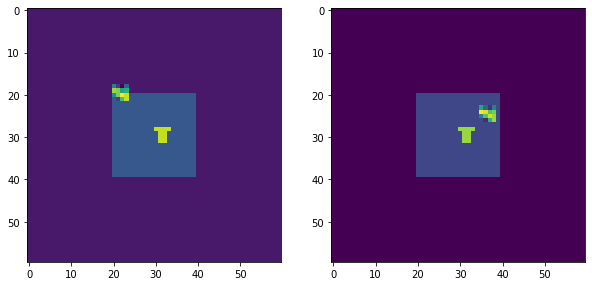

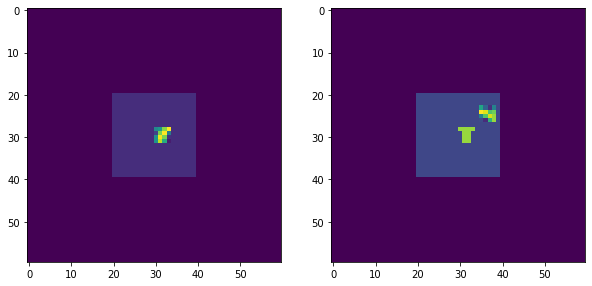

In [4]:
env = Env()
block = env.block
print(block._max_dist)
print([block.shift_x, block.block_x, block.shift_y, block.block_y])
xx = [block.shift_x - block.block_x-10, block.shift_y - block.block_y -10, 0]
state, reward, t = env.step(xx)

print([block.shift_x, block.block_x, block.shift_y, block.block_y])
print(reward, xx, block.distance(), block.prev_dist)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)

print([block.shift_x, block.block_x, block.shift_y, block.block_y])

xx = [block.shift_x - block.block_x-0.5, block.shift_y - block.block_y -0.5, -block.rotate_angle + 0.1]
state, reward, t = env.step(xx)

print([block.shift_x, block.block_x, block.shift_y, block.block_y])
print(reward, xx, block.distance(), block.prev_dist)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)


### Agent Training

In [ ]:
from rlvs.block_world.env import Env
from rlvs.agents.ddpg_agent import DDPGAgent
import numpy as np
env = Env()
agent = DDPGAgent(env)
actions =  agent.play(10000)

/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/in-justin.jose/.miniconda/envs/rl-virtual-screening/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/actor.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  conv_model_1 = Conv2D(64, 5, 5,  activation='relu')(conv_model)
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/actor.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu")`
  conv_model_1 = Conv2D(64, 4, 4,  activation='relu')(conv_model_1)
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/actor.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  conv_model_1 = Conv2D(64, 3, 3,  activation='relu')(conv_model_1)


/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/critic.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  conv_model_1 = Conv2D(64, 5, 5,  activation='relu')(conv_model)
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/critic.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu")`
  conv_model_1 = Conv2D(64, 4, 4,  activation='relu')(conv_model_1)
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/critic.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  conv_model_1 = Conv2D(64, 3, 3,  activation='relu')(conv_model_1)
/Users/in-justin.jose/Documents/Projects/E4R/rl-virtual-screening/rlvs/network/actor.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarra

Action: [-1.          1.          0.06837896] Reward: 0 E_i: 1 Block state: [48, 34, -30.07, 35, 35] Dist: 13.0726 critic loss 0.00021
Action: [-2.          2.          0.09164176] Reward: 0.4549 E_i: 2 Block state: [46, 36, -30.16, 35, 35] Dist: 11.0798 critic loss 0.06018
Action: [-3.          3.         -1.60750687] Reward: 0.4989 E_i: 3 Block state: [43, 39, -28.55, 35, 35] Dist: 8.9752 critic loss 0.12802
Action: [-4.          3.         -1.76730466] Reward: 0.5193 E_i: 4 Block state: [39, 42, -26.79, 35, 35] Dist: 8.0895 critic loss 0.10757
Action: [-5.          3.         -2.01021481] Reward: 0 E_i: 5 Block state: [34, 45, -24.77, 35, 35] Dist: 10.0732 critic loss 0.10577
Action: [-5.          2.         -2.13757849] Reward: 0 E_i: 6 Block state: [29, 47, -22.64, 35, 35] Dist: 13.4359 critic loss 0.05511
Action: [-6.          3.         -0.27189669] Reward: 0 E_i: 7 Block state: [23, 50, -22.37, 35, 35] Dist: 19.2284 critic loss 0.05086
Action: [-7.         4.        -0.0934938]

In [ ]:
env = agent.env
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
env.block.update_sandbox()
ax1.imshow(env.block.sandbox)
ax2.imshow(env.block.original_sandbox)
plt.show()
print(env.block.block_x, env.block.block_y, env.block.shift_x, env.block.shift_y)